In [1]:
#ch 19
from skimage.io import imread
from skimage.transform import resize 
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [2]:
%matplotlib inline

/Users/apple/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


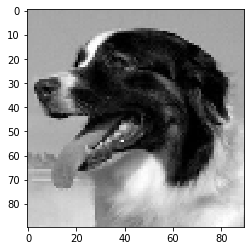

In [3]:
example_file = ("http://upload.wikimedia.org/" +
    "wikipedia/commons/7/7d/Dog_face.png")
image = imread(example_file, as_grey=True)
plt.imshow(image, cmap=cm.gray)
plt.show()

In [4]:
pip install -U scikit-image

Requirement already up-to-date: scikit-image in ./anaconda3/lib/python3.6/site-packages (0.15.0)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings("ignore")
from skimage import filters, restoration
from skimage.morphology import disk
median_filter = filters.rank.median(image, disk(1))
tv_filter = restoration.denoise_tv_chambolle(image, weight=0.1)
gaussian_filter = filters.gaussian(image, sigma=0.7)


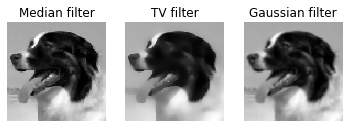

In [6]:
fig = plt.figure()
for k,(t,F) in enumerate((('Median filter',median_filter), 
                        ('TV filter',tv_filter), 
                        ('Gaussian filter', gaussian_filter))):
    f=fig.add_subplot(1,3,k+1)
    plt.axis('off')
    f.set_title(t)
    plt.imshow(F, cmap=cm.gray)
plt.show()

In [7]:
print("data type: %s, shape: %s" % 
      (type(image), image.shape))

data type: <class 'numpy.ndarray'>, shape: (90, 90)


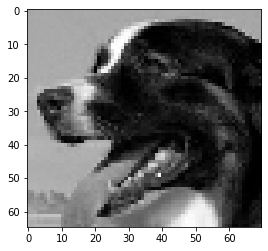

In [8]:
image2 = image[5:70,0:70]
plt.imshow(image2, cmap=cm.gray)
plt.show()

data type: <class 'numpy.ndarray'>, shape: (30, 30)


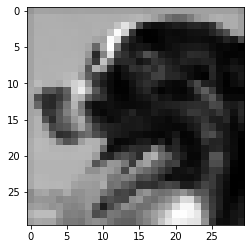

In [9]:
#image3 = resize(image2, (30, 30), mode='nearest')
image3 = resize(image2, (30, 30), mode='constant')
plt.imshow(image3, cmap=cm.gray)
print("data type: %s, shape: %s" % 
      (type(image3), image3.shape))

In [10]:
image_row = image3.flatten()
print("data type: %s, shape: %s" % 
      (type(image_row), image_row.shape))

data type: <class 'numpy.ndarray'>, shape: (900,)


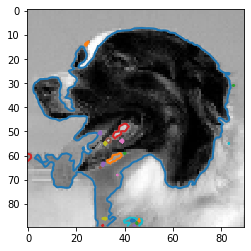

In [11]:
from skimage import measure
contours = measure.find_contours(image, 0.55)
plt.imshow(image, cmap=cm.gray)
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.axis('image')
plt.show()


In [12]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)
train_faces = dataset.data[:350,:]
test_faces  = dataset.data[350:,:]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

In [13]:
print (dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [14]:
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
n_components = 25
Rpca = RandomizedPCA(n_components=n_components, 
            whiten=True, random_state=101).fit(train_faces)
print ('Explained variance by %i components: %0.3f' % 
       (n_components, np.sum(Rpca.explained_variance_ratio_)))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces  = Rpca.transform(test_faces)

Explained variance by 25 components: 0.794


We are looking for face id=34


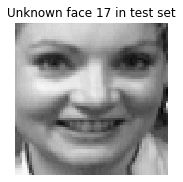

In [15]:
import matplotlib.pyplot as plt
photo = 17 # This is the photo in the test set we want to know about
print ('We are looking for face id=%i' % test_answers[photo])
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray
           , interpolation='nearest')
plt.show()

In [16]:
mask = compressed_test_faces[photo,] #Just the vector of value components of our photo
squared_errors = np.sum((compressed_train_faces - mask)**2,axis=1)
minimum_error_face = np.argmin(squared_errors)
most_resembling = list(np.where(squared_errors < 20)[0])
print ('Best resembling face in train test: %i' % 
       train_answers[minimum_error_face])

Best resembling face in train test: 34


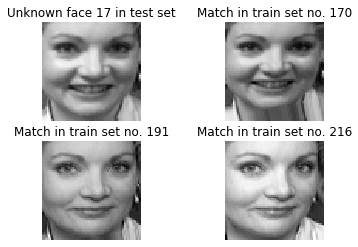

In [17]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64), 
           cmap=plt.cm.gray, interpolation='nearest')
for k,m in enumerate(most_resembling[:3]):
   plt.subplot(2, 2, 2+k)
   plt.title('Match in train set no. '+str(m))
   plt.axis('off')
   plt.imshow(train_faces[m].reshape(64,64), 
              cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [18]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=60,
                              resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = [lfw_people.target_names[a] for a in y]
n_samples, h, w = lfw_people.images.shape
from collections import Counter
for name, count in Counter(target_names).items():
    print ("%20s %i" % (name, count))

        Colin Powell 236
       George W Bush 530
         Hugo Chavez 71
   Junichiro Koizumi 60
          Tony Blair 144
        Ariel Sharon 77
     Donald Rumsfeld 121
   Gerhard Schroeder 109


StratifiedShuffleSplit(n_splits=1, random_state=101, test_size=0.3,
            train_size=None)
TRAIN: [2 3 0 5] TEST: [4 1]


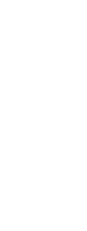

In [19]:
# Book code not workable. These are improvised codes.
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=101)
sss.get_n_splits(X, y)
1
print(sss)       
StratifiedShuffleSplit(n_splits=1, random_state=0)
for train_index, test_index in sss.split(X, y):

    print("TRAIN:", train_index, "TEST:", test_index)


plt.subplot(1, 4, 1)
plt.axis('off')
for k,m in enumerate(X[train_index][y[train_index]==6][:4]):
    plt.subplot(1, 4, 1+k)
    if k==0:
        plt.title('Train set')
    plt.axis('off')
    plt.imshow(m.reshape(28,18), 
               cmap=plt.cm.gray, interpolation='nearest')
plt.show()

for k,m in enumerate(X[test_index][y[test_index]==6][:4]):
    plt.subplot(1, 4, 1+k)
    if k==0:
        plt.title('Test set')
    plt.axis('off')
    plt.imshow(m.reshape(28,18), 
               cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [20]:
# Book codes not workable. These are improvised codes.
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA
n_components = 1
pca = RandomizedPCA(n_components=n_components,
                                  whiten=True).fit(X[train_index,:])
nmf = NMF(n_components=n_components, 
                        init='nndsvda', tol=5e-3).fit(X[train_index,:])
fastica = FastICA(n_components=n_components,
                                whiten=True).fit(X[train_index,:])
#eigenfaces = pca.components_.reshape(n_components)
X_dec = np.column_stack((pca.transform(X[train_index,:]), 
        nmf.transform(X[train_index,:]), fastica.transform(X[train_index,:])))
Xt_dec = np.column_stack((pca.transform(X[test_index,:]), 
        nmf.transform(X[test_index,:]), fastica.transform(X[test_index,:])))
y_dec = y[train_index]
yt_dec = y[test_index]

In [21]:
# Ch 19 Remaining book codes not workable.

In [22]:
# Ch 20
text_1 = 'The quick brown fox jumps over the lazy dog.'
text_2 = 'My dog is quick and can jump over fences.'
text_3 = 'Your dog is so lazy that it sleeps all the day.'
corpus = [text_1, text_2, text_3]

In [23]:
from sklearn.feature_extraction import text
vectorizer = text.CountVectorizer(binary=True).fit(corpus)
vectorized_text = vectorizer.transform(corpus)
print(vectorized_text.todense())

[[0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0]
 [0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1]]


In [24]:
print(vectorizer.vocabulary_)

{'the': 19, 'quick': 15, 'brown': 2, 'fox': 7, 'jumps': 11, 'over': 14, 'lazy': 12, 'dog': 5, 'my': 13, 'is': 8, 'and': 1, 'can': 3, 'jump': 10, 'fences': 6, 'your': 20, 'so': 17, 'that': 18, 'it': 9, 'sleeps': 16, 'all': 0, 'day': 4}


In [25]:
text_4 = 'A black dog just passed by but my dog is brown.'
corpus.append(text_4)
vectorizer = text.CountVectorizer().fit(corpus)
vectorized_text = vectorizer.transform(corpus)
print(vectorized_text.todense()[-1])

[[0 0 1 1 1 1 0 0 2 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0]]


In [26]:
TfidF = text.TfidfTransformer(norm='l1')
tfidf = TfidF.fit_transform(vectorized_text)

phrase = 3 # choose a number from 0 to 3
total = 0
for word in vectorizer.vocabulary_:
    pos = vectorizer.vocabulary_[word]
    value = list(tfidf.toarray()[phrase])[pos]
    if value !=0:
        print ("%10s: %0.3f" % (word, value))
        total += value
print ('\nSummed values of a phrase: %0.1f' % total)

     brown: 0.095
       dog: 0.126
        my: 0.095
        is: 0.077
     black: 0.121
      just: 0.121
    passed: 0.121
        by: 0.121
       but: 0.121

Summed values of a phrase: 1.0


In [27]:
bigrams = text.CountVectorizer(ngram_range=(2,2))
print (bigrams.fit(corpus).vocabulary_)

{'the quick': 30, 'quick brown': 24, 'brown fox': 3, 'fox jumps': 9, 'jumps over': 15, 'over the': 21, 'the lazy': 29, 'lazy dog': 17, 'my dog': 19, 'dog is': 7, 'is quick': 11, 'quick and': 23, 'and can': 1, 'can jump': 6, 'jump over': 14, 'over fences': 20, 'your dog': 31, 'is so': 12, 'so lazy': 26, 'lazy that': 18, 'that it': 27, 'it sleeps': 13, 'sleeps all': 25, 'all the': 0, 'the day': 28, 'black dog': 2, 'dog just': 8, 'just passed': 16, 'passed by': 22, 'by but': 5, 'but my': 4, 'is brown': 10}


In [28]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.feature_extraction import text

import nltk
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

vocab = ['Sam loves swimming so he swims all the time']
vect = text.CountVectorizer(tokenizer=tokenize, 
                           stop_words='english')
vec = vect.fit(vocab)

sentence1 = vec.transform(['George loves swimming too!'])

print (vec.get_feature_names())
print (sentence1.toarray())

['love', 'sam', 'swim', 'time']
[[1 0 1 0]]


[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
!pip install pandas

In [31]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [32]:
from bs4 import BeautifulSoup
import pandas as pd
try:
    import urllib2 # Python 2.7.x
except:
    import urllib.request as urllib2 # Python 3.x

wiki = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
header = {'User-Agent': 'Mozilla/5.0'} 
query = urllib2.Request(wiki, headers=header)
page = urllib2.urlopen(query)
soup = BeautifulSoup(page, "lxml")

In [34]:
table = soup.find("table", { "class" : "wikitable sortable" })
final_table = list()
for row in table.findAll('tr'):
    cells = row.findAll("td")
    if len(cells) >=6:
        v1 = cells[1].find(text=True)
        v2 = cells[2].find(text=True)
        v3 = cells[3].find(text=True)
        v4 = cells[4].find(text=True)
        v5 = cells[6].findAll(text=True)
        #v5 = v5[2].split()[0]
        final_table.append([v1, v2, v3, v4, v5])
cols = ['City','State','Population_2014','Census_2010'
        ,'Land_Area_km2']
df = pd.DataFrame(final_table, columns=cols)

In [35]:
df

,City,State,Population_2014,Census_2010,Land_Area_km2
0,New York,,"8,398,748\n","8,175,133\n",[301.5 sq mi\n]
1,Los Angeles,,"3,990,456\n","3,792,621\n",[468.7 sq mi\n]
2,Chicago,,"2,705,994\n","2,695,598\n",[227.3 sq mi\n]
3,Houston,,"2,325,502\n","2,100,263\n",[637.5 sq mi\n]
4,Phoenix,,"1,660,272\n","1,445,632\n",[517.6 sq mi\n]
5,Philadelphia,,"1,584,138\n","1,526,006\n",[134.2 sq mi\n]
6,San Antonio,,"1,532,233\n","1,327,407\n",[461.0 sq mi\n]
7,San Diego,,"1,425,976\n","1,307,402\n",[325.2 sq mi\n]
8,Dallas,,"1,345,047\n","1,197,816\n",[340.9 sq mi\n]
9,San Jose,,"1,030,119\n","945,942\n",[177.5 sq mi\n]


In [36]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, 
    categories = ['misc.forsale'],
     remove=('headers', 'footers', 'quotes'), random_state=101)
print ('Posts: %i' % len(dataset.data))

Posts: 585


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, 
            min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(dataset.data)
from sklearn.decomposition import NMF
n_topics = 5
nmf = NMF(n_components=n_topics, random_state=101).fit(tfidf)

In [38]:
feature_names = vectorizer.get_feature_names()
n_top_words = 15
for topic_idx, topic in enumerate(nmf.components_):
   print ("Topic #%d:" % (topic_idx+1),)
   print (" ".join([feature_names[i] for i in 
                    topic.argsort()[:-n_top_words - 1:-1]]))

Topic #1:
condition excellent asking offer best car old new sale 10 miles 000 tape cd power
Topic #2:
00 50 dos 20 10 15 cover 1st new 25 price man 40 shipping comics
Topic #3:
drive hard card floppy monitor meg ram disk motherboard vga modem brand scsi color internal
Topic #4:
email looking game games send interested mail thanks like edu good want package price list
Topic #5:
shipping vcr works stereo obo included amp plus great volume unc mathes gibbs radley remotes


In [39]:
print (nmf.components_[0,:].argsort()[:-n_top_words-1:-1]) 
# Gets top words for topic 0

[1075 1459  632 2463  740  888 2476 2415 2987   10 2305    1 3349  923
 2680]


In [40]:
print (vectorizer.get_feature_names()[1337]) 
# Transforms index 1337 back to text

drive


In [41]:
try:
    import urllib2 # Python 2.7.x
except:
    import urllib.request as urllib2 # Python 3.x
import requests, io, os, zipfile

UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'
response = requests.get(UCI_url)
compressed_file = io.BytesIO(response.content)
z = zipfile.ZipFile(compressed_file)
print ('Extracting in %s' %  os.getcwd())
for name in z.namelist():
    filename = name.split('/')[-1]
    nameOK = ('MACOSX' not in name and '.DS' not in name)
    if filename and nameOK:
            newfile = os.path.join(os.getcwd(), 
                                   os.path.basename(filename))
            with open(newfile, 'wb') as f:
                f.write(z.read(name))
            print ('\tunzipping %s' % newfile)

Extracting in /Users/apple
	unzipping /Users/apple/amazon_cells_labelled.txt
	unzipping /Users/apple/imdb_labelled.txt
	unzipping /Users/apple/readme.txt
	unzipping /Users/apple/yelp_labelled.txt


In [42]:
import numpy as np
import pandas as pd
dataset = 'imdb_labelled.txt'
data = pd.read_csv(dataset, header=None, sep=r"\t", engine='python')
data.columns = ['review','sentiment']

In [43]:
data.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [46]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
corpus, test_corpus, y, yt = train_test_split(data.ix[:,0], data.ix[:,1], test_size=0.25, random_state=101)

In [47]:
from sklearn.feature_extraction import text
vectorizer = text.CountVectorizer(ngram_range=(1,2), 
                    stop_words='english').fit(corpus)
TfidF = text.TfidfTransformer()
X = TfidF.fit_transform(vectorizer.transform(corpus))
Xt = TfidF.transform(vectorizer.transform(test_corpus))

In [49]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
clf = GridSearchCV(LinearSVC(loss='hinge', 
                    random_state=101), param_grid)
clf = clf.fit(X, y)
print ("Best parameters: %s" % clf.best_params_)

Best parameters: {'C': 1.0}


In [50]:
from sklearn.metrics import accuracy_score
solution = clf.predict(Xt)
print("Achieved accuracy: %0.3f" % 
      accuracy_score(yt, solution))

Achieved accuracy: 0.816


In [51]:
print(test_corpus[yt!=solution])

601    There is simply no excuse for something this p...
32     This is the kind of money that is wasted prope...
887    At any rate this film stinks, its not funny, a...
668    Speaking of the music, it is unbearably predic...
408         It really created a unique feeling though.  
413         The camera really likes her in this movie.  
138    I saw "Mirrormask" last night and it was an un...
132    This was a poor remake of "My Best Friends Wed...
291                               Rating: 1 out of 10.  
904    I'm so sorry but I really can't recommend it t...
410    A world better than 95% of the garbage in the ...
55     But I recommend waiting for their future effor...
826    The film deserves strong kudos for taking this...
100            I don't think you will be disappointed.  
352                                    It is shameful.  
171    This movie now joins Revenge of the Boogeyman ...
814    You share General Loewenhielm's exquisite joy ...
218    It's this pandering to t